In [1]:
#Data Preprossing and the data analysisi
#step-1 :import necessay library
#step:2 read data set
#step:3 sanity check of data
#step:4 exploratory data analysis
#step:5: missing value treatment
#step:6: outlier treatment
#step:7: duplicate and garbage value treatment
#step:8: Normalization
#step:9: Encoding of data

In [2]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Read dataset
df = pd.read_csv("student-dataset.csv")  # Replace with your CSV file name
#df.describe()  # Summary statistics (mean, min, max, etc.)
df
#df.head()
#df.tail()


,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,0,Kiana Lor,China,Suzhou,31.31,120.62,F,NaN,22.0,3.5,3.7,3.1,1.0,4,4.0,4
1,1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,M,NaN,22.0,2.9,3.2,3.6,5.0,5,4.0,5
2,2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,F,NaN,22.0,3.9,3.8,3.2,5.0,3,3.0,4
3,3,Natasha Yarusso,United States of America,Castro Valley,37.69,-122.09,F,NaN,20.0,3.3,2.8,3.2,5.0,5,2.0,4
4,4,Brooke Cazares,Brazil,São José dos Campos,-23.18,-45.88,F,NaN,21.0,3.7,2.6,3.4,1.0,4,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,Eliana Michelsen,United States of America,Oakland,37.80,-122.27,F,NaN,23.0,3.0,2.8,2.9,5.0,4,4.0,5
306,306,Dane Whittemore,Canada,Toronto,43.67,NaN,M,NaN,NaN,3.8,3.2,NaN,5.0,5,4.0,5
307,304,Zachary Mulvahill,United States of America,Los Angeles,34.05,-118.24,M,NaN,20.0,3.2,3.4,3.9,5.0,5,5.0,3
308,305,Eliana Michelsen,United States of America,Oakland,37.80,-122.27,F,NaN,23.0,3.0,2.8,2.9,5.0,4,4.0,5


In [4]:
#Sanity chat of databases(identification, missing value, outlier, grabage, duplicate,etc)
#df.shape #(give total coloumne, and row count)
#df.info()  #(coloum with null count and dtype)
df.isnull().sum()

id                      0
name                    0
nationality             0
city                    0
latitude                0
longitude               2
gender                  0
ethnic.group          310
age                     2
english.grade           0
math.grade              0
sciences.grade          2
language.grade          0
portfolio.rating        0
coverletter.rating      0
refletter.rating        0
dtype: int64

In [5]:
#Finding percentages of missing value
df.isnull().sum()/df.shape[0]*100

id                      0.000000
name                    0.000000
nationality             0.000000
city                    0.000000
latitude                0.000000
longitude               0.645161
gender                  0.000000
ethnic.group          100.000000
age                     0.645161
english.grade           0.000000
math.grade              0.000000
sciences.grade          0.645161
language.grade          0.000000
portfolio.rating        0.000000
coverletter.rating      0.000000
refletter.rating        0.000000
dtype: float64

In [6]:
#finding Duplicate
print(df[df.duplicated()])


      id               name               nationality         city  latitude  \
307  304  Zachary Mulvahill  United States of America  Los Angeles     34.05   
308  305   Eliana Michelsen  United States of America      Oakland     37.80   
309  306    Dane Whittemore                    Canada      Toronto     43.67   

     longitude gender  ethnic.group   age  english.grade  math.grade  \
307    -118.24      M           NaN  20.0            3.2         3.4   
308    -122.27      F           NaN  23.0            3.0         2.8   
309        NaN      M           NaN   NaN            3.8         3.2   

     sciences.grade  language.grade  portfolio.rating  coverletter.rating  \
307             3.9             5.0                 5                 5.0   
308             2.9             5.0                 4                 4.0   
309             NaN             5.0                 5                 4.0   

     refletter.rating  
307                 3  
308                 5  
309      

In [7]:
#finding garbage value
#print(df['nationality'].unique()) # Look for "???", "N/A", "unknown", or other invalid placeholders.
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts(normalize=True))  # Explicit use of normalize=True
    print("-" * 10)  # Prints "----------" as a clear separator


name
Zachary Mulvahill    0.006452
Eliana Michelsen     0.006452
Dane Whittemore      0.006452
Kiana Lor            0.003226
Michael Melendrez    0.003226
                       ...   
Kolbi Strunk         0.003226
Brittany Sath        0.003226
Meggan Smith         0.003226
Ericka Arreola       0.003226
Joshua Lonaker       0.003226
Name: proportion, Length: 307, dtype: float64
----------
nationality
United States of America    0.629032
Mexico                      0.077419
China                       0.041935
Japan                       0.041935
Brazil                      0.029032
India                       0.025806
Canada                      0.025806
Russian Federation          0.019355
Colombia                    0.016129
Korea (Republic of)         0.009677
Pakistan                    0.009677
Spain                       0.006452
United Kingdom              0.006452
Turkey                      0.006452
Philippines                 0.003226
Poland                      0.003226
Peru

In [8]:
#Data Analysis descritive statistics
#df.describe()
#df.describe().T
df.describe(include="object")

,name,nationality,city,gender
count,310,310,310,310
unique,307,31,161,3
top,Zachary Mulvahill,United States of America,Los Angeles,F
freq,2,195,47,153


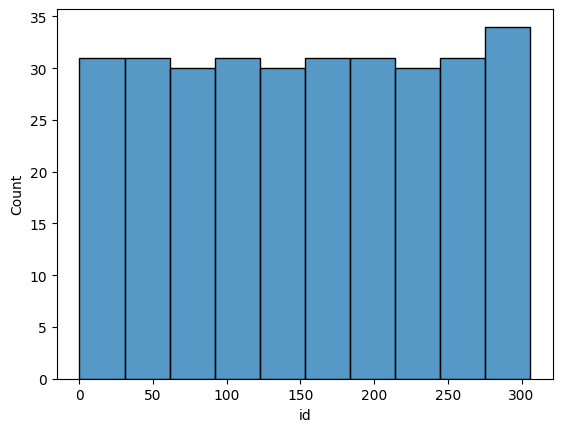

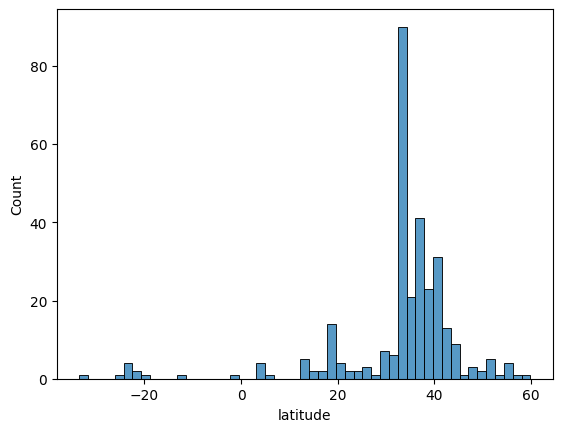

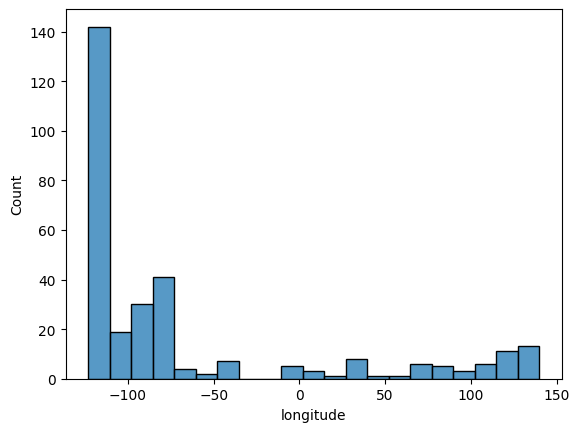

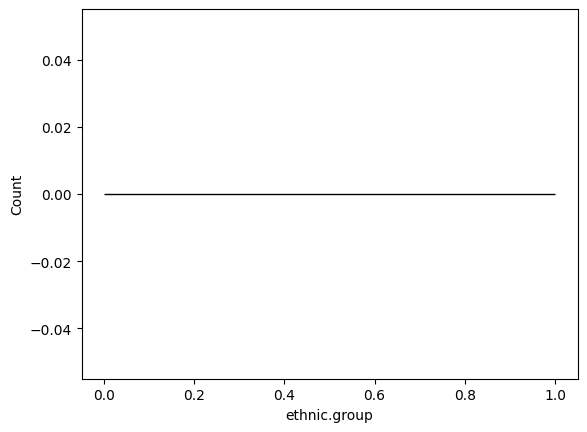

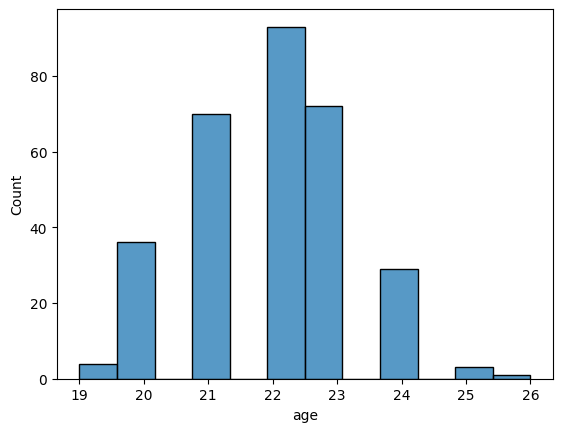

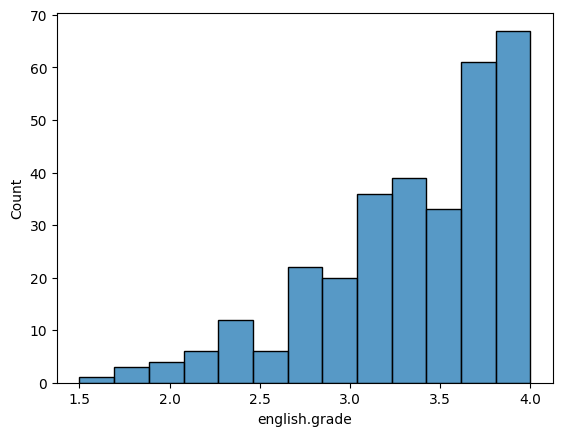

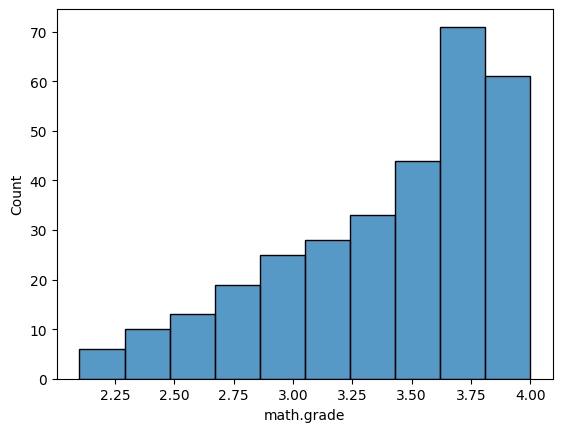

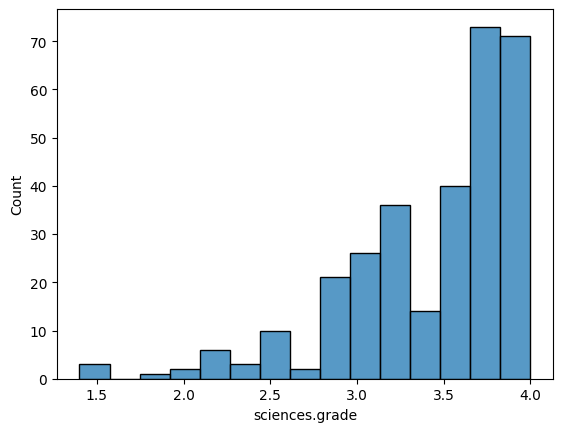

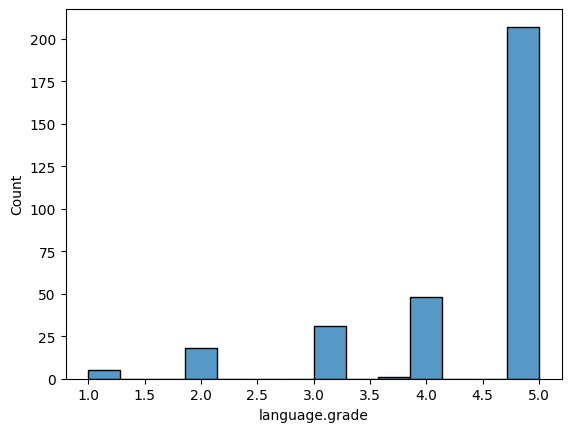

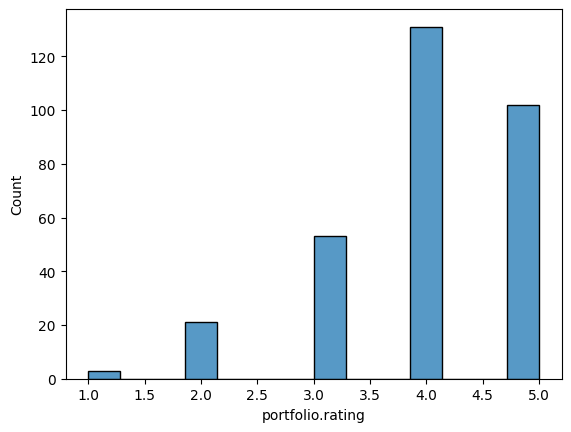

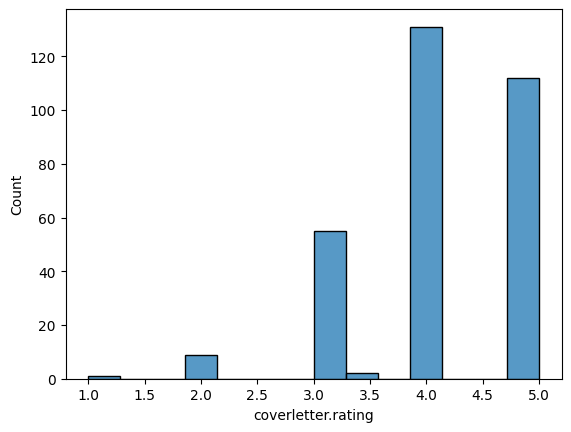

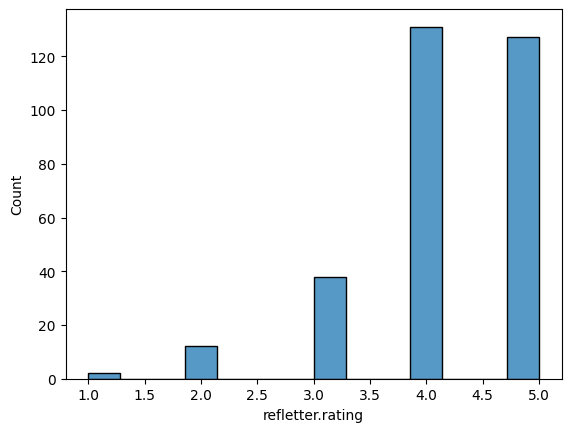

In [9]:
#HistoGram to understand databse
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

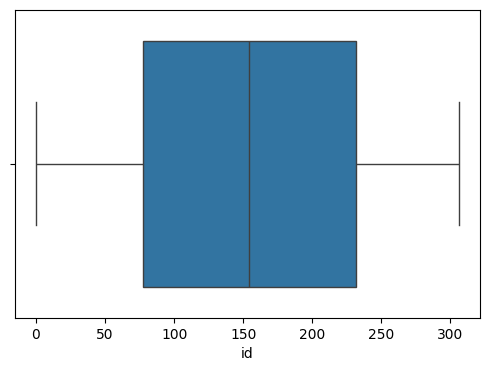

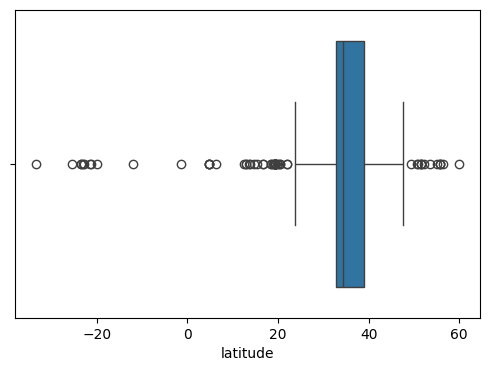

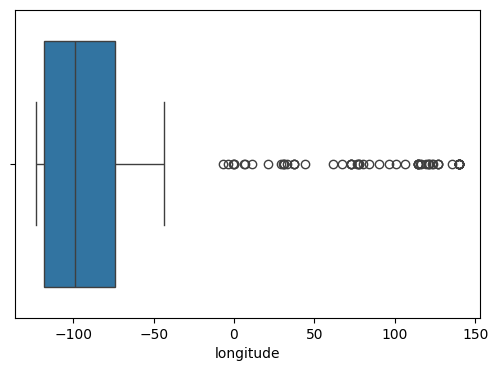

Skipping column ethnic.group (all values are NaN)


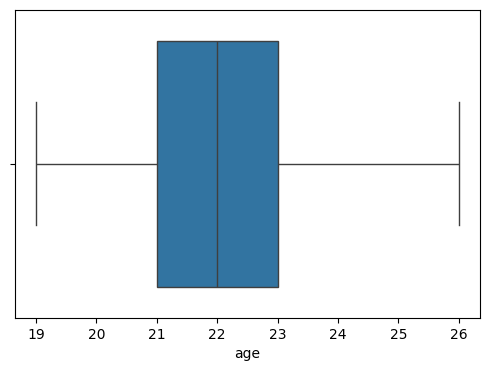

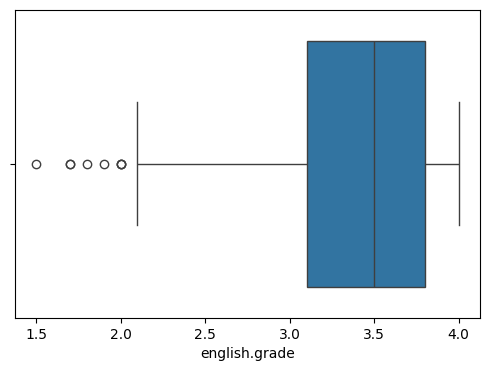

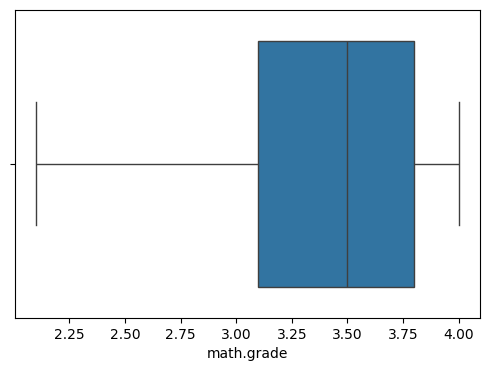

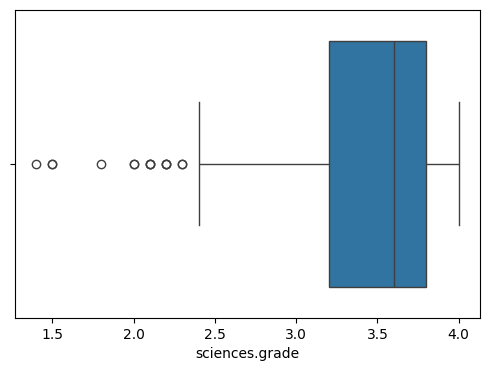

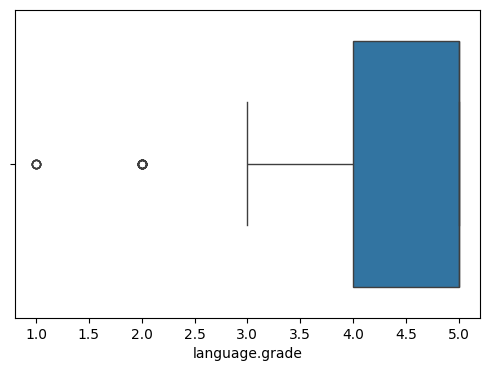

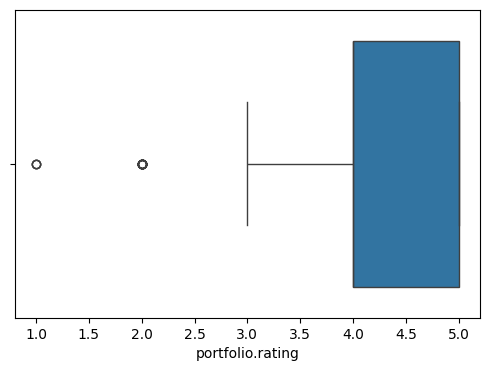

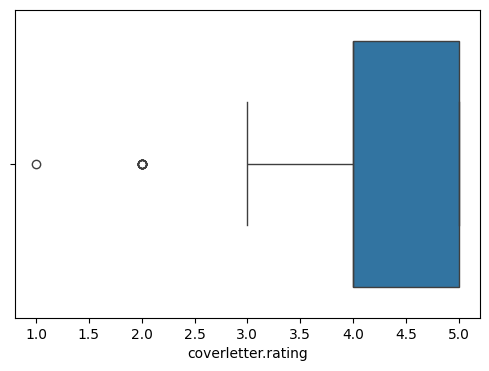

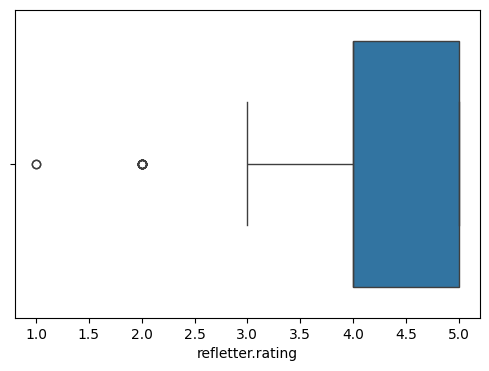

In [10]:
#BoxPlot to identify the outlier
# import warnings
# warnings.filterwarnings("ignore")
# for i in df.select_dtypes(include="number").columns:
#     sns.boxplot(data=df, x=i)
#     plt.show()

warnings.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')  # Convert non-numeric values to NaN
    df[i] = df[i].replace([np.inf, -np.inf], np.nan)  # Remove infinite values

    # Skip columns where all values are NaN or only one unique value
    if df[i].isna().all():
        print(f"Skipping column {i} (all values are NaN)")
        continue
    if df[i].nunique() <= 1:
        print(f"Skipping column {i} (only one unique value)")
        continue

    plt.figure(figsize=(6, 4))  # Set figure size
    sns.boxplot(x=df[i])
    plt.show()


<Axes: >

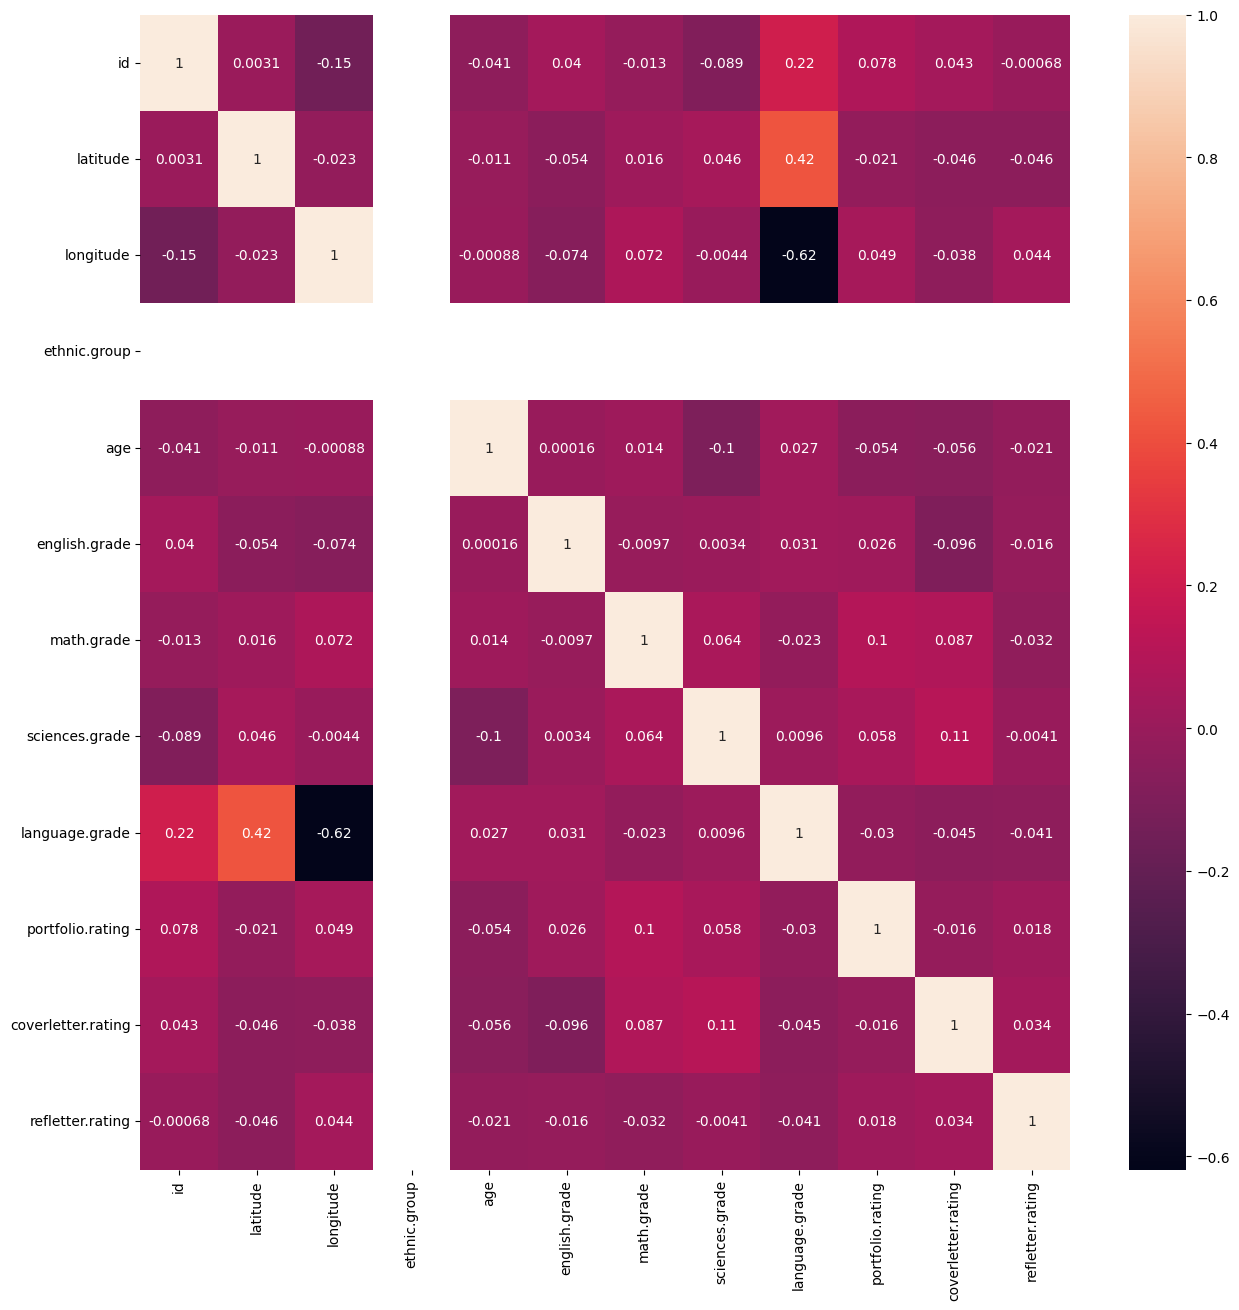

In [11]:
#corrletion with heatmap
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [12]:
#Missing value Treatment
#categorical and discreate value we filled with the mode/KNNImputer
#Numerical by median
df.isnull().sum()
for i in["longitude", "age"]:
    df[i].fillna(df[i].median(),inplace=True)